In [449]:
import numpy as np
import pandas as pd
import random, math, copy


In [450]:
def load_files(directory):
    data_sets = []   
    os.chdir(r"{}".format(directory))
    files = os.listdir()
    for file in files:
        data = pd.read_csv(''.join(file))
        data_sets.append(data)
    os.chdir(r"..")
    return data_sets


In [451]:
data_sets = load_files('data')

In [452]:
def data_to_node(data_set):
    nodes = []
    for index, row in data_set.iterrows():
        nodes.append(np.array(row))
    return np.array(nodes)

In [453]:
node_sets = []
for ds in data_sets:
    node_sets.append(data_to_node(ds))

In [454]:
def gen_rand(length):
    n = random.randint(0,length)
    return n

def euclidean_distance(dim, A, B):
    s = 0
    for i in range(dim):
        s += math.pow(A[i] - B[i],2)
    return math.sqrt(s)

# calculate belonging rate of kth node to ith cluster
def cal_blng_r(Xk, Vi, c, m, centroid_nodes):
    distance_Xk_Vi = euclidean_distance(len(Xk), Xk, Vi)
    dis_sum, Uik = 0, 1
    for centroid_node in centroid_nodes:
        distance_Xk_Vj = euclidean_distance(len(Xk), Xk, centroid_node)
        if distance_Xk_Vj != 0:
            dis_sum += math.pow((distance_Xk_Vi/distance_Xk_Vj), 2/(m-1))
    if dis_sum != 0:
        Uik = 1/(dis_sum)
    return Uik

In [455]:
def update_centroid_node(i, node_set, belonging_rates, m):
    sum_top, sum_bottom = 0, 0
    #calc_weighted_avg
    for j in range(len(node_set)):
        sum_bottom += np.power(belonging_rates[j][i], m)
        sum_top += np.power(belonging_rates[j][i], m)*node_set[j]
    return sum_top/sum_bottom

In [456]:
def c_means(m, cluster_num, node_set):
    belonging_rates_ks = []
    k_pack = []
    for k in range(1,cluster_num+1):
        centroid_nodes = []
        belonging_rates = [0]*len(node_set)
        # set random centroid nodes
        for _ in range(k):
            n = gen_rand(len(node_set))
            centroid_nodes.append(node_set[n])
        # repeat 100 types
        for _ in range(100):
            # calculate belonging rates 
            for i in range(len(node_set)):
                belonging_rate = []
                for clus_center in centroid_nodes:
                    belonging_rate.append(cal_blng_r(Xk=node_set[i], Vi=clus_center, c=len(centroid_nodes), m=m, centroid_nodes=centroid_nodes))
                belonging_rates[i] = belonging_rate
            # calculate new centroid nodes
            for i in range(len(centroid_nodes)):
                centroid_nodes[i] = update_centroid_node(i, node_set, belonging_rates, m)
        k_pack.append([node_set, centroid_nodes])
        belonging_rates_ks.append(belonging_rates)
    return k_pack, belonging_rates_ks


In [457]:
import numpy as np
import matplotlib.pyplot as plt

def draw_plot(node_set, k_pack, belonging_rates_ks):
    for i in range(len(k_pack)):
        bels = []
        for belonging_rate in belonging_rates_ks[i]:
            bel = (np.max(belonging_rate)-np.min(belonging_rates))/(np.max(belonging_rates)-np.min(belonging_rates))
            bels.append(bel)
        plt.scatter(node_set[:,0], node_set[:,1] , c=bels)
        for center in k_pack[i][1]:
            plt.scatter(center[0], center[1] , color='red')
        plt.colorbar()
        plt.show()


In [458]:
def draw_crisp_plot(node_set, k_pack, belonging_rates_ks):
    for i in range(len(k_pack)):
        bels_crisp = []
        for belonging_rate in belonging_rates_ks[i]:
            s = 0
            for i in range(len(belonging_rate)):
                s += belonging_rate[i]*(i+1)
            bels_crisp.append(s)
        plt.scatter(node_set[:,0], node_set[:,1] , c=bels_crisp)
        for center in k_pack[i][1]:
            plt.scatter(center[0], center[1] , color='red')
        plt.colorbar()
        plt.show()


In [459]:
def calc_cost(k_pack):
    Js = []
    for i in range(len(k_pack)):
        node_set = k_pack[i][0]
        centroid_nodes = k_pack[i][1]
        belonging_rates = belonging_rates_ks[i]
        J = 0
        for j in range(len(node_set)):
            for i in range(len(centroid_nodes)):
                J += math.pow(belonging_rates[j][i], m)*np.linalg.norm(node_set[j] - centroid_nodes[i])
        Js.append(J)
    return Js

# First data set

## for m = 1.3

### Calc c-means

In [460]:
%%time
k_pack, belonging_rates_ks = c_means(1.3, 5, node_sets[0])

Wall time: 34.4 s


### Draw plot

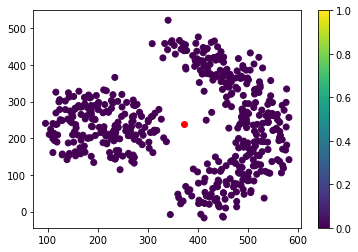

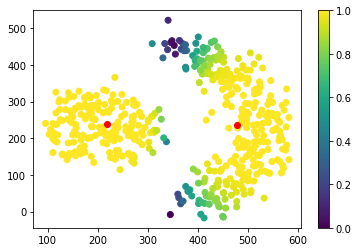

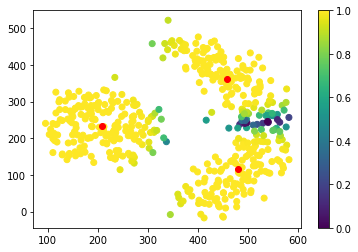

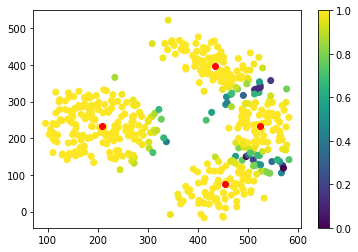

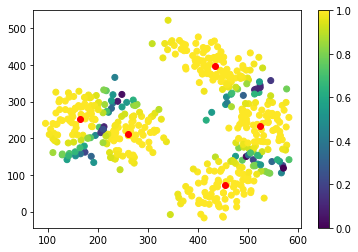

In [461]:
draw_plot(node_sets[0], k_pack, belonging_rates_ks)

## Draw crisp plot

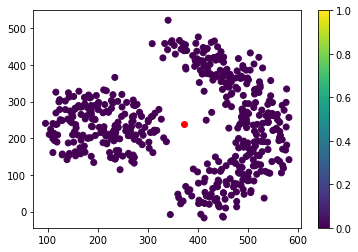

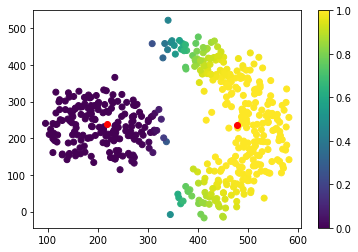

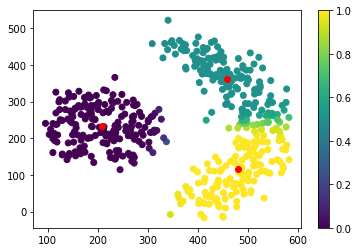

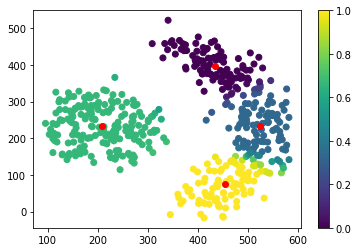

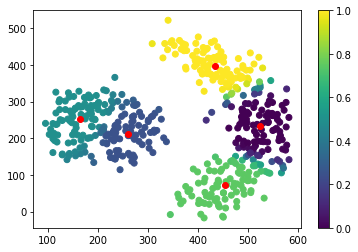

In [462]:
draw_crisp_plot(node_sets[0], k_pack, belonging_rates_ks)

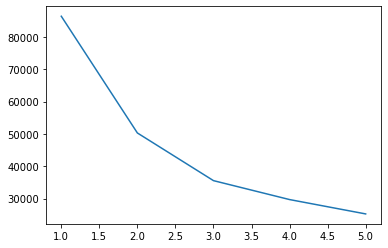

In [463]:
Js = calc_cost(k_pack)
plt.plot([1,2,3,4,5],Js)
plt.show()

## for m = 2

### Calc c-means

In [464]:
%%time
k_pack, belonging_rates_ks = c_means(2.5, 5, node_sets[0])

Wall time: 36.1 s


### Draw plot

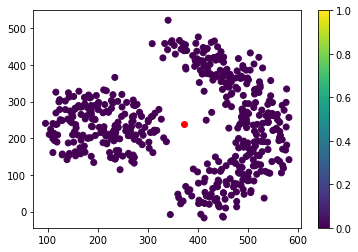

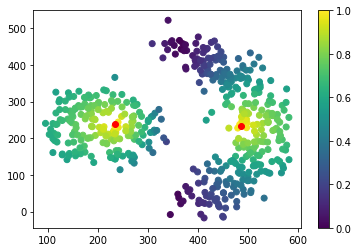

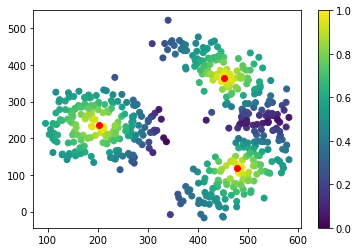

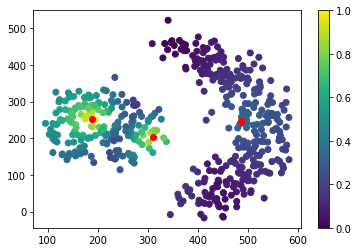

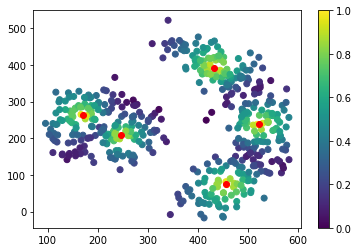

In [465]:
draw_plot(node_sets[0], k_pack, belonging_rates_ks)

## Draw crisp plot

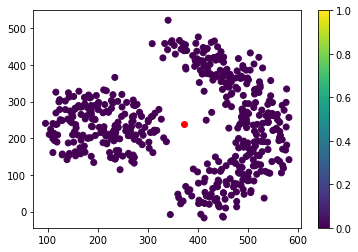

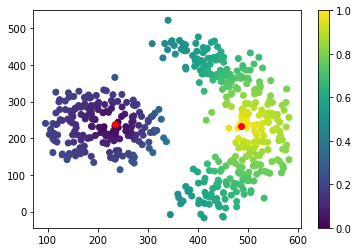

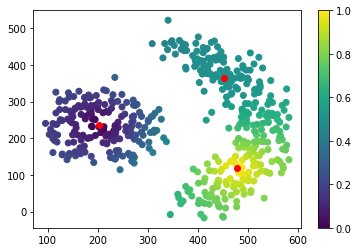

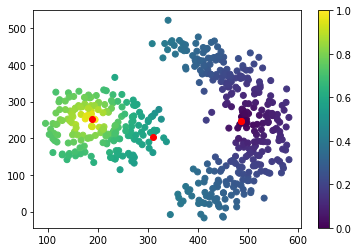

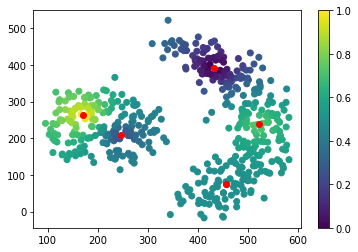

In [466]:
draw_crisp_plot(node_sets[0], k_pack, belonging_rates_ks)

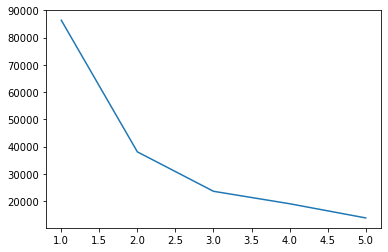

In [467]:
Js = calc_cost(k_pack)
plt.plot([1,2,3,4,5],Js)
plt.show()

## for m = 4

### Calc c-means

In [468]:
%%time
k_pack, belonging_rates_ks = c_means(5, 5, node_sets[0])

Wall time: 35.2 s


### Draw plot

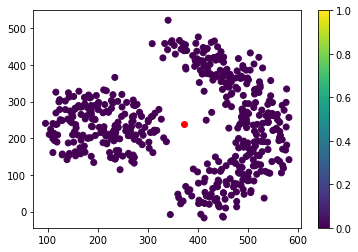

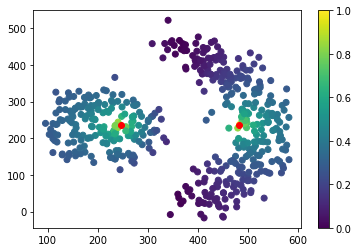

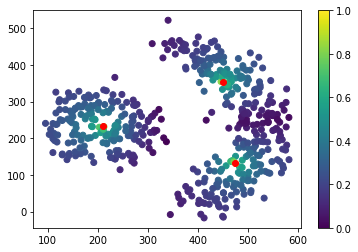

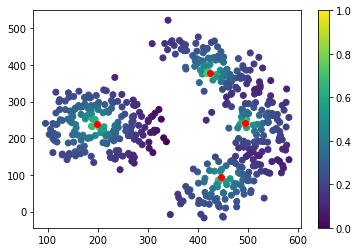

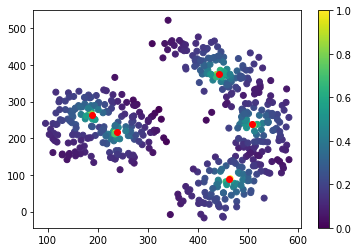

In [469]:
draw_plot(node_sets[0], k_pack, belonging_rates_ks)

## Draw crisp plot

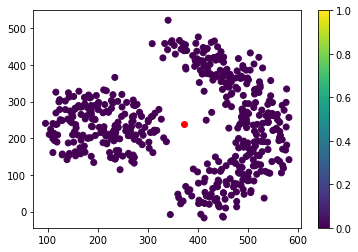

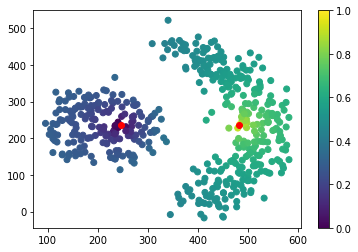

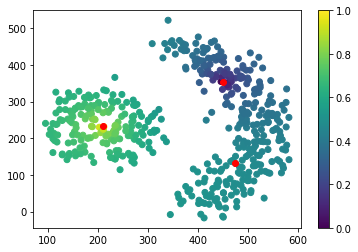

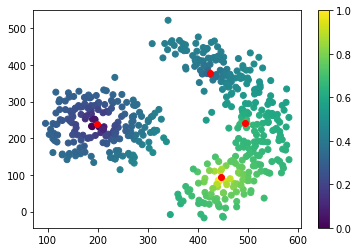

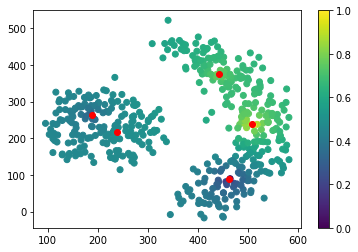

In [470]:
draw_crisp_plot(node_sets[0], k_pack, belonging_rates_ks)

### Calc cost and draw plot

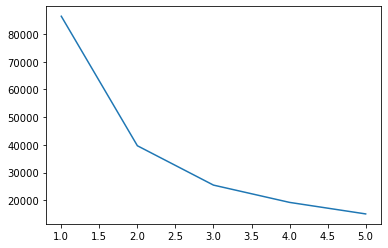

In [471]:
Js = calc_cost(k_pack)
plt.plot([1,2,3,4,5],Js)
plt.show()

  ## بررسی تاثیر بر روی کلاسترها:
  ## همانطور که از شکل ها مشخص است هر چه مقدار اِم بیشتر شود کلاسترها سافت تر و فازی تر می شوند و این به سبب نقش اِم در فرمول میزان تعلق می باشد.

## بررسی تاثیر بر روی نمودار هزینه:
## اگه به نمودارهای هزینه ی کشیده شده دقت کنیم هر چه مقدار اِم ها بیشتر شود شیب کاهش ناگهانی افزایش یافته و به بیان دیگر زاویه ی اِلبو کاهش می یابد و به 90 درجه نزدیکتر می شود که در واقع بیانگر این است که در تعیین مقدار خوشه ها با استفاده از اِلبو به انتخاب تعداد خوشه های کمتر می انجامد.

## همانطور که از نمودار کاست برای اِم برابر 2 مشاهده می شود مقدار 3 برای سی(تعداد خوشه ها) مناسب به نظر می رسد.  
## همچنین می توان گفت که مقدار 2 برای اِم مقدار مناسبی است

# Third data set

In [472]:
%%time
k_pack, belonging_rates_ks = c_means(2, 5, node_sets[2])

Wall time: 51 s


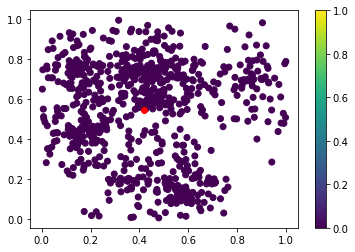

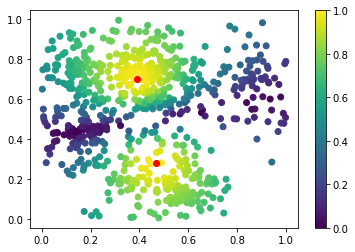

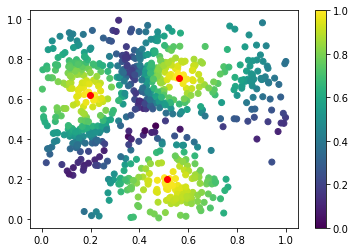

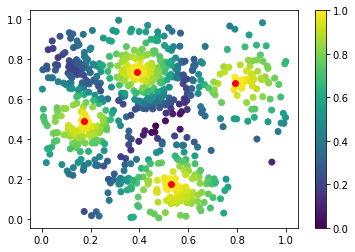

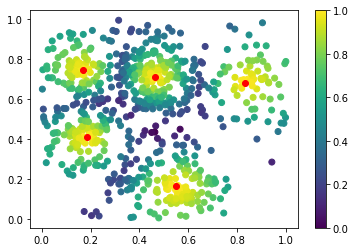

In [473]:
draw_plot(node_sets[2], k_pack, belonging_rates_ks)

## Draw crisp plot 

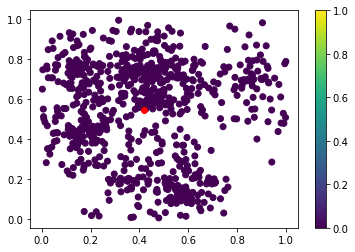

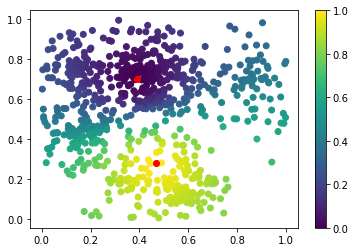

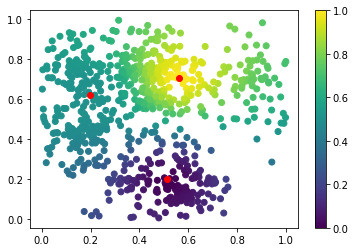

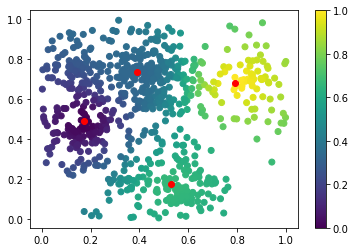

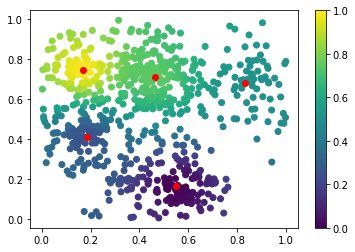

In [474]:
draw_crisp_plot(node_sets[2], k_pack, belonging_rates_ks)

In [475]:
Js = calc_cost(k_pack)

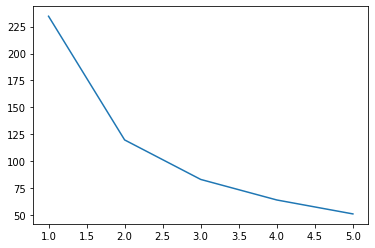

In [476]:
plt.plot([1,2,3,4,5], Js)
plt.show()


## مشاهده می کنیم که مقدار 2 برای تعداد خوشه ها مناسب به نظر می رسد

# Second data set

In [477]:
%%time
k_pack, belonging_rates_ks = c_means(2, 5, node_sets[1])

Wall time: 1min 53s


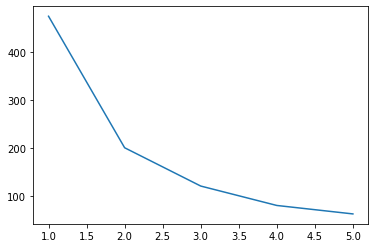

In [478]:
Js = calc_cost(k_pack)
plt.plot([1,2,3,4,5], Js)
plt.show()

## همانطور که مشخص است مقدار 3 برای تعداد خوشه ها مناسب به نظر می رسد

# Fourth data set

In [479]:
%%time
k_pack, belonging_rates_ks = c_means(2, 5, node_sets[3])

Wall time: 41 s


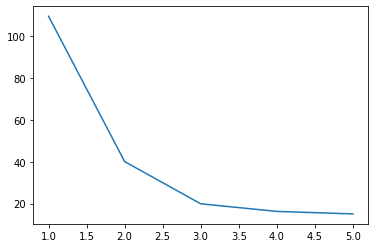

In [480]:
Js = calc_cost(k_pack)
plt.plot([1,2,3,4,5], Js)
plt.show()

## همانطور که از نمودار مشاهده می شود مقدار 2 برای تعداد خوشه ها مناسب به نظر می رسد